# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [ ]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [ ]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
X = boston.data
y = boston.target

# 3. Train test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

# 4. Simple Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.score(xtrain,ytrain)

0.7496833578194886

In [ ]:
model.score(xtest,ytest)

0.6905866151617355

# 5. Ridge Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Ridge
modelr = Ridge(alpha=100)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain,ytrain)

0.7229156495945772

In [ ]:
modelr.score(xtest,ytest)

0.6685984029229395

# 6. Lasso Regularization for Linear Model

In [ ]:
from sklearn.linear_model import Lasso
modelr = Lasso(alpha= 0.2)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain,ytrain)

0.7293317763303089

In [ ]:
modelr.score(xtest,ytest)

0.6818891705624226

# 7. Polynomial Regression of degree 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xtrain_poly = pf.fit_transform(xtrain)
xtest_poly = pf.fit_transform(xtest)

In [ ]:
lrp = LinearRegression()
lrp.fit(xtrain_poly, ytrain)
lrp.score(xtrain_poly,ytrain)

0.9105499348053767

In [ ]:
lrp.fit(xtest_poly,ytest)
lrp.score(xtest_poly,ytest)

0.999400852795681

# 8. Ridge Regularization for Polynomial model

In [ ]:
modelrp = Ridge(alpha=10)
modelrp.fit(xtrain_poly,ytrain)
modelrp.score(xtrain_poly,ytrain)

0.9278413838142907

In [ ]:
modelrp.score(xtest_poly,ytest)

0.8364201895671388

# 9. Lasso Regularization for Polynomial model

In [ ]:
modelrpl = Lasso(alpha=1)
modelrpl.fit(xtrain_poly,ytrain)
modelrpl.score(xtrain_poly,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.283e+03, tolerance: 3.503e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8908523002178003

In [ ]:
modelrpl.score(xtest_poly,ytest)

0.8220578636562867

# 10. Select K Best

In [ ]:
from sklearn.feature_selection  import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func=f_regression,k=7)
x_selected = kb.fit_transform(xtrain,ytrain)
x_selected[0]

array([  3.44 ,   0.437,   7.185,   5.   , 398.   ,  15.2  ,   5.39 ])

In [ ]:
model = LinearRegression()
model.fit(x_selected,ytrain)

LinearRegression()

In [ ]:
model.score(x_selected,ytrain)

0.6964101252765844

In [ ]:
model.score(x_selected,ytest)

-2.461138985687545

In [ ]:
columns = ['LSTAT', 'ZN', 'INDUS', 'TAX','PTRATIO']

In [ ]:
tdf = pd.DataFrame(xtest,columns=boston.feature_names)
tdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  0.14103   0.0  13.92   0.0  0.437  5.790   58.0  6.3200   4.0  289.0   
1  0.12744   0.0   6.91   0.0  0.448  6.770    2.9  5.7209   3.0  233.0   
2  0.17134   0.0  10.01   0.0  0.547  5.928   88.2  2.4631   6.0  432.0   
3  0.08221  22.0   5.86   0.0  0.431  6.957    6.8  8.9067   7.0  330.0   
4  9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   

   PTRATIO       B  LSTAT  
0     16.0  396.90  15.84  
1     17.9  385.41   4.84  
2     17.8  344.91  15.76  
3     19.1  386.09   3.53  
4     20.2  366.15   9.53

In [ ]:
test_selected = tdf[columns]
test_selected.shape

(102, 5)

In [ ]:
model.score(x_selected,ytrain)

0.6964101252765844

In [ ]:
traindf = pd.DataFrame(data=xtrain, columns=boston.feature_names)
traindf['target'] = ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0   0.08370  45.0   3.44   0.0  0.437  7.185   38.9  4.5667   5.0  398.0   
1   0.12802   0.0   8.56   0.0  0.520  6.474   97.1  2.4329   5.0  384.0   
2   0.12083   0.0   2.89   0.0  0.445  8.069   76.0  3.4952   2.0  276.0   
3  17.86670   0.0  18.10   0.0  0.671  6.223  100.0  1.3861  24.0  666.0   
4   0.09512   0.0  12.83   0.0  0.437  6.286   45.0  4.5026   5.0  398.0   

   PTRATIO       B  LSTAT  target  
0     15.2  396.90   5.39    34.9  
1     20.9  395.24  12.27    19.8  
2     18.0  396.90   4.21    38.7  
3     20.2  393.74  21.78    10.2  
4     18.7  383.23   8.94    21.4

In [ ]:
corr = traindf.corr()
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.192674  0.394708 -0.060466  0.410910 -0.205502  0.338196   
ZN      -0.192674  1.000000 -0.519870 -0.040285 -0.495694  0.324516 -0.552028   
INDUS    0.394708 -0.519870  1.000000  0.064355  0.760712 -0.407267  0.639781   
CHAS    -0.060466 -0.040285  0.064355  1.000000  0.085739  0.087198  0.105816   
NOX      0.410910 -0.495694  0.760712  0.085739  1.000000 -0.307294  0.721331   
RM      -0.205502  0.324516 -0.407267  0.087198 -0.307294  1.000000 -0.240361   
AGE      0.338196 -0.552028  0.639781  0.105816  0.721331 -0.240361  1.000000   
DIS     -0.374979  0.644073 -0.705327 -0.089181 -0.770538  0.221784 -0.735512   
RAD      0.613310 -0.305414  0.591611 -0.041796  0.595010 -0.215528  0.443537   
TAX      0.573064 -0.319709  0.721092 -0.056592  0.660397 -0.301878  0.495717   
PTRATIO  0.296755 -0.395756  0.387204 -0.145583  0.164623 -0.357208  0.234712   
B       -0.363232  0.179401 -0.377939  0.047629 -0.415378  0.130658 -0.285025   
LSTAT    0.455295 -0.391550  0.597760 -0.034571  0.572066 -0.615007  0.582464   
target  -0.400548  0.376907 -0.507193  0.164583 -0.443745  0.687480 -0.386377   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
CRIM    -0.374979  0.613310  0.573064  0.296755 -0.363232  0.455295 -0.400548  
ZN       0.644073 -0.305414 -0.319709 -0.395756  0.179401 -0.391550  0.376907  
INDUS   -0.705327  0.591611  0.721092  0.387204 -0.377939  0.597760 -0.507193  
CHAS    -0.089181 -0.041796 -0.056592 -0.145583  0.047629 -0.034571  0.164583  
NOX     -0.770538  0.595010  0.660397  0.164623 -0.415378  0.572066 -0.443745  
RM       0.221784 -0.215528 -0.301878 -0.357208  0.130658 -0.615007  0.687480  
AGE     -0.735512  0.443537  0.495717  0.234712 -0.285025  0.582464 -0.386377  
DIS      1.000000 -0.492633 -0.544605 -0.240555  0.304212 -0.486448  0.273887  
RAD     -0.492633  1.000000  0.913298  0.486503 -0.469602  0.484529 -0.411356  
TAX     -0.544605  0.913298  1.000000  0.475689 -0.466381  0.542336 -0.498115  
PTRATIO -0.240555  0.486503  0.475689  1.000000 -0.191621  0.379999 -0.517460  
B        0.304212 -0.469602 -0.466381 -0.191621  1.000000 -0.396826  0.358955  
LSTAT   -0.486448  0.484529  0.542336  0.379999 -0.396826  1.000000 -0.745466  
target   0.273887 -0.411356 -0.498115 -0.517460  0.358955 -0.745466  1.000000

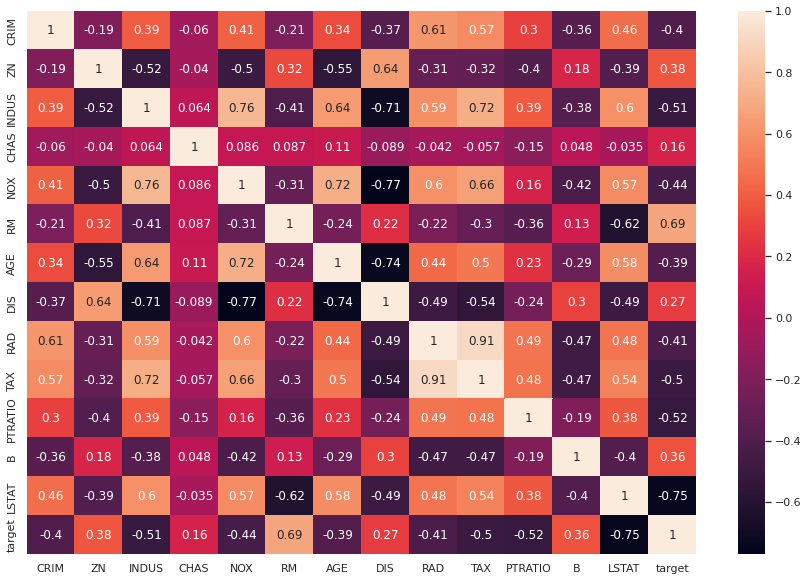

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

In [ ]:
selected_columns = ['CRIM', 'INDUS', 'NOX', 'RM','PTRATIO','LSTAT']

In [ ]:
train_selected = traindf[selected_columns]
test_selected = tdf[selected_columns]
test_selected.head()

CRIM  INDUS    NOX     RM  PTRATIO  LSTAT
0  0.14103  13.92  0.437  5.790     16.0  15.84
1  0.12744   6.91  0.448  6.770     17.9   4.84
2  0.17134  10.01  0.547  5.928     17.8  15.76
3  0.08221   5.86  0.431  6.957     19.1   3.53
4  9.23230  18.10  0.631  6.216     20.2   9.53

In [ ]:
kmodel = LinearRegression()
kmodel.fit(train_selected, ytrain)
kmodel.score(train_selected, ytrain)

0.6895899863416712

In [ ]:
kmodel.fit(test_selected, ytest)
kmodel.score(test_selected, ytest)

0.6971827061272335

# 11. Conclusion

why regularization?

To reduce the error by fitting a function appropriately on the given training set and avoid overfitting.


